In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel("iris.xls")

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,iris,Unnamed: 5,Unnamed: 6,sepal length.1,Unnamed: 8
0,5.1,3.5,1.4,0.2,Iris-setosa,NaN,NaN,Count,150.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,NaN,NaN,Minimum,4.300000
2,4.7,3.2,1.3,0.2,Iris-setosa,NaN,NaN,Maximum,7.900000
3,4.6,3.1,1.5,0.2,Iris-setosa,NaN,NaN,Mean,5.843333
4,5.0,3.6,1.4,0.2,Iris-setosa,NaN,NaN,Median,5.800000


In [4]:
X=df.iloc[ : , :4]

In [5]:
y=df["iris"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [8]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)  
RF.fit(X_train, y_train)  
y_pred = RF.predict(X_test)

In [9]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30



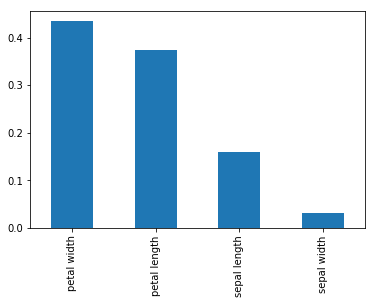

In [13]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(RF.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='bar')
plt.show()

In [16]:
feat_importances

sepal length    0.159232
sepal width     0.031220
petal length    0.374206
petal width     0.435343
dtype: float64